# Classification Using Naive Bayes and Tree Based Algorithm

# Practice

##  Classification Using Naive Bayes Algorithm

Task 1

### Import libraries

In [115]:
# Load libraries
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score

### Data Collection

In [150]:
#reading .data file passing a parameter sep=','

df=pd.read_csv('/Users/VamseeMuppavarapu/Archanaa_NIIT/Naive_Bayes/DS2_C5_S4_Wine_Data_Practice.data',sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
# structure of the data
df.shape


(178, 14)

In [152]:
# to know different class labels
classes=df[0].value_counts()
classes

2    71
1    59
3    48
Name: 0, dtype: int64

Data Dictionary
1st attribute is class identifier
there are 3 types of wines
All attributes are cont
https://archive.ics.uci.edu/ml/datasets/wine

9


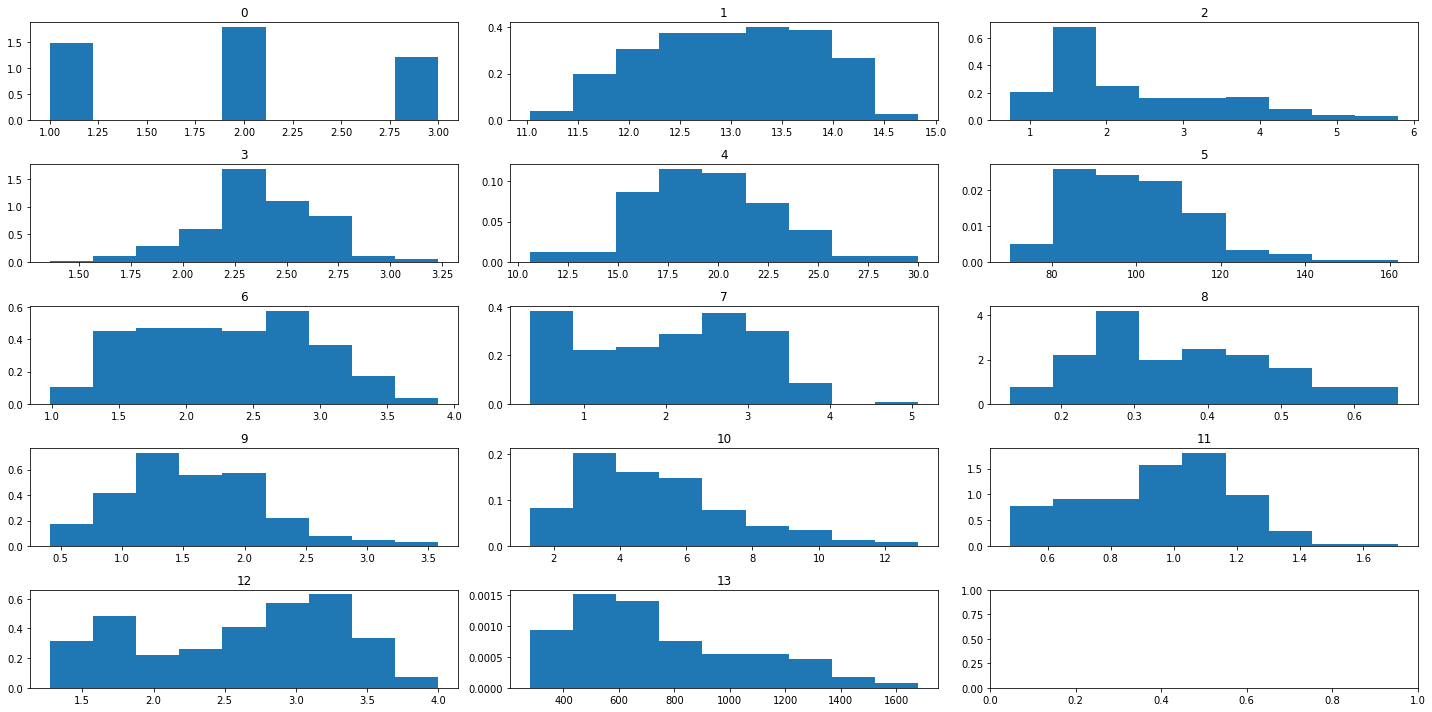

In [153]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df1 = df.select_dtypes(include=numerics)
numeric_cols=df1.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n))
  
bin_count = int(np.ceil(np.log2(len(df1.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(df1[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

Inference: 
DO all the data columns have normal distribution?
NO. There are skewness present in the data
Cols 0,1,3,4,6 --> Normally distributed
COls 2,5,7,8,9,10,11,13. --> Right skewed
Cols  12-- Right Skewed


Skewed data are outliers that affect the model performance .So, to use a skewed data ,we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model

### Task 2 Data preparation

In [154]:
#checking for missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

Standard scalar normalizatiom doesn’t have any fixed minimum or maximum value. Here, the values of all the columns are scaled in such a way that they all have a mean equal to 0 and standard deviation equal to 1. This scaling technique works well with outliers. Thus, this technique is preferred if outliers are present in the dataset.

In [121]:
# Normalizing the data with Zero mean and unit variance
#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)

### Data Splitting

In [155]:
cor=df_scaled.corr()
cor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
1,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
2,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
3,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
4,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
5,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
6,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
7,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
8,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
9,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


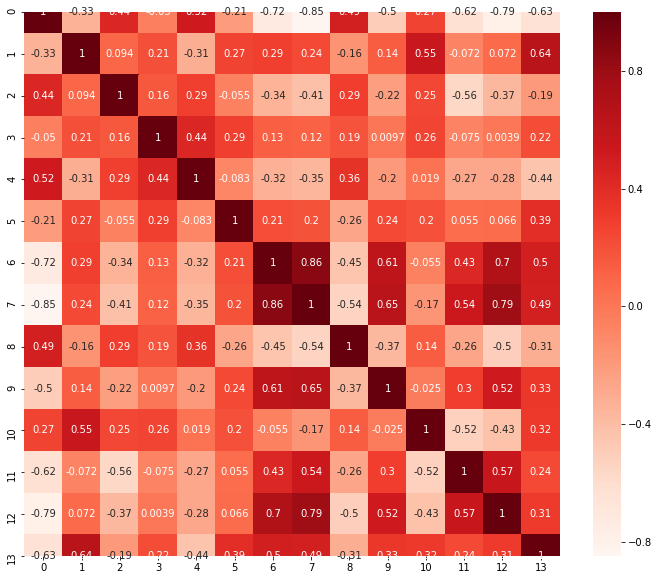

In [156]:
 #generating heatmap
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


###  Task 3
Build the model

In [157]:
# Train test split  
x=df.iloc[:,2:]
y=df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [158]:
print(x.shape)
print(y.shape)

(178, 12)
(178,)


In [159]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [160]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train) 
print('Training accuracy',classifier.score(x_train,y_train))

Training accuracy 0.9577464788732394


### Evaluate the Model

In [161]:
# Predicting the Test set results  

y_pred = classifier.predict(x_test) 
print('Test Accuracy is ', classifier.score(x_test,y_test))


Test Accuracy is  1.0


In [162]:
# Making the Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [163]:
print(y_test.shape)
print(y_pred.shape)
print(x_train.shape)
print(y_train.shape)

(36,)
(36,)
(142, 12)
(142,)


In [164]:
# Evaluate Accuracy Score
#Accuracy calculated using accuracy_score by giving y_test and y_pred
print('Test Accuracy',accuracy_score(y_test, y_pred))

#Acc can also be calculated using model.score method
#model.score(x_test,y_test)


Test Accuracy 1.0


In [165]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 1.0
recall: 1.0
f1-score: 1.0
precision: 1.0


## Task 4: Classification Using Decision Tree Based Algorithm

### Import Data & Python Packages

In [166]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [172]:
# load dataset
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.20, random_state = 42)

#Normalizing the data
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

### Modeling - Decision Tree Classifier

In [173]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(x_train1,y_train1)
#Predict the response for test dataset
y_pred1 = clf.predict(x_test1)

### Evaluation

In [174]:
# Model Accuracy, how often is the classifier correct?
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9444444444444444


In [175]:
# confusion matrix
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,y_pred1)

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]])

In [176]:
# Evaluate other metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test1, y_pred1))
print('recall:', recall_score(y_test1, y_pred1, average='weighted'))
print('f1-score:', f1_score(y_test1, y_pred1, average='weighted'))
print('precision:', precision_score(y_test1, y_pred1,average='weighted'))

accuracy: 0.9444444444444444
recall: 0.9444444444444444
f1-score: 0.9448559670781894
precision: 0.9513888888888888


###Inferences

Comparing the Gaussian and DT model. Which is better?

Gaussian has Test accuracy of 100% , DT has a test accuracy of 94%
Similarly, when comparing other performance metrics on these 2 models, Gaussian model is better fitting the data.

So, Gaussian is the best model to classify the wine data set